In [ ]:
import os

import requests



from dotenv import load_dotenv

from api.lib.tools import (
    BaseApartment,
    FullApartment,
    Face,
    Pt,
    Line,
    FitReferenceRequest,
)


load_dotenv(".env")

In [ ]:
root_url = os.getenv("API_ROOT_URL")

<Axes: >

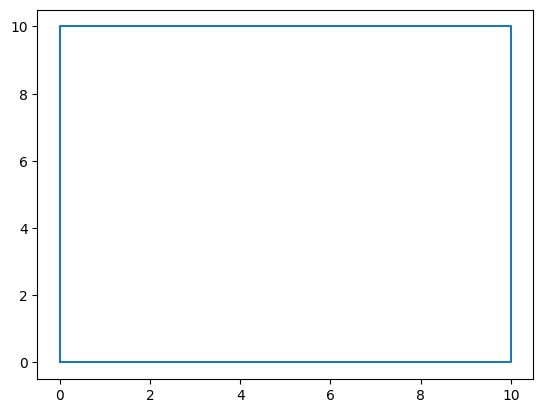

In [3]:
base_apt = BaseApartment(
    bounds=Face(
        corners=[
            Pt(loc=(0, 0)),
            Pt(loc=(0, 10)),
            Pt(loc=(10, 10)),
            Pt(loc=(10, 0)),
        ]
    ),
    facade=[
        Line(
            start=Pt(loc=(0, 0)),
            end=Pt(loc=(0, 10)),
        ),
    ],
    circulaton=[
        Line(
            start=Pt(loc=(10, 0)),
            end=Pt(loc=(10, 10)),
        ),
    ],
)
base_apt.plot()

In [4]:
fit_db_url = root_url + "/fit/db"
res = requests.post(fit_db_url, data=base_apt.model_dump_json())
results = res.json()

In [5]:
fit_reference_url = root_url + "/fit/reference"
full_apt = FullApartment()
body = FitReferenceRequest(
    base_apt=base_apt,
    full_apt=full_apt,
)
res = requests.post(fit_reference_url, data=body.model_dump_json())
results = res.json()